In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1.Load the data from “college.csv” that has attributes collected about private and public colleges for a particular year. We will try to predict the private/public status of the college from other attributes.

In [2]:
df=pd.read_csv('c:/edureka/college.csv')
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
df.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.3+ KB


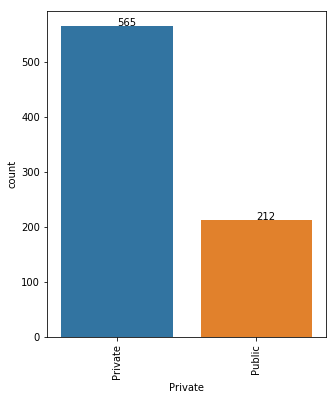

In [5]:
#sns.countplot(x='Private',data=df)
plt.figure(figsize=(5,6))
total=df['Private'].value_counts()
ax = sns.countplot(data=df,x='Private',ax=total.plot.bar() )
ax.set_xticklabels(["Private","Public"])
for i, v in total.reset_index().iterrows():
   ax.text(i, v.Private, v.Private)

# 2.Use LabelEncoder to encode the target variable in to numerical form 

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencode=LabelEncoder()
df['Private']=labelencode.fit_transform(df['Private'])
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Private        777 non-null int32
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int32(1), int64(16)
memory usage: 106.3 KB


In [8]:
X=df.drop(['Private'],axis=1)
y=df['Private']

# split the data such that 20% of the data is set aside for testing.

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

# 3.Fit a linear svm from scikit learn 

In [10]:
from sklearn.svm import SVC
svmodel=SVC(kernel='linear')
svmodel.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [16]:
y_pred=svmodel.predict(X_test)

# observe the accuracy usin Linear SVM.

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[ 18  21]
 [  1 116]]
0.8589743589743589


# 4.Preprocess the data using StandardScalar and fit the same model again and observe the change in accuracy.

In [18]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [19]:
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.fit_transform(X_test)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
from sklearn.svm import SVC
svmodel=SVC(kernel='linear')
svmodel.fit(X_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [21]:
y_pred=svmodel.predict(X_test_scaled)

# Change in accuracy after StandardScalar

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[ 38   1]
 [  5 112]]
0.9615384615384616


# 5.Use scikit learn’s gridsearch to select the best hyperparameter for a non-linear SVM, identify the model with best score and its parameters.

In [23]:
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

In [24]:
from sklearn.model_selection import GridSearchCV

In [26]:
grid=GridSearchCV(SVC(),parameter_candidates,refit=True,verbose=4)

In [27]:
grid.fit(X_train_scaled,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.9278846153846154, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.9468599033816425, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.9320388349514563, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] .... C=10, kernel=linear, score=0.9326923076923077, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] .... C=10, kernel=linear, score=0.9516908212560387, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] .... C=10, kernel=linear, score=0.9320388349514563, total=   0.0s
[CV] C=100, kernel=linear ............................................
[CV] ... C=100, 

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    3.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

# select the best hyperparameter for a non-linear SVM

In [28]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [29]:
grid_prediction=grid.predict(X_test_scaled)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(y_test,grid_prediction))
print(confusion_matrix(y_test,grid_prediction))
print(classification_report(y_test,grid_prediction))

0.9551282051282052
[[ 37   2]
 [  5 112]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       0.98      0.96      0.97       117

   micro avg       0.96      0.96      0.96       156
   macro avg       0.93      0.95      0.94       156
weighted avg       0.96      0.96      0.96       156

